# Here im going to clean the data

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## testing version control

df = pd.read_csv('../src/taxipred/data/taxi_trip_pricing.csv')

## Droping these columns for now as i dont need it for price


In [36]:
df["null_count"] = df.isnull().sum(axis=1)
df = df.drop(["Passenger_Count", "Traffic_Conditions", "Weather", "Day_of_Week", "Time_of_Day"], axis=1)


In [37]:
df = df[df["null_count"] < 2].drop(columns="null_count")

## Calculations i need to use to replace outliers and missing values

Per_Minute_Rate = (Trip_Price - Base_Fare - Per_Km_Rate*Trip_Distance_km) / Trip_Duration_Minutes

Trip_Duration_Minutes = (Trip_Price - Base_Fare - Per_Km_Rate*Trip_Distance_km) / Per_Minute_Rate

Trip_Distance_km = (Trip_Price - Base_Fare - Per_Minute_Rate*Trip_Duration_Minutes) / Per_Km_Rate

Per_Km_Rate = (Trip_Price - Base_Fare - Per_Minute_Rate*Trip_Duration_Minutes) / Trip_Distance_km

Base_Fare = Trip_Price - (Per_Minute_Rate*Trip_Duration_Minutes) - (Per_Km_Rate*Trip_Distance_km)

As i am very bad at math i took help from a math expert in what calculations to use.

A mask is basically me marking the rows that match a condition, and pandas does the rest.

In [38]:
mask = df["Per_Minute_Rate"].isna() & (df["Trip_Duration_Minutes"] > 0)
num = (df.loc[mask, "Trip_Price"]
       - df.loc[mask, "Base_Fare"]
       - df.loc[mask, "Trip_Distance_km"] * df.loc[mask, "Per_Km_Rate"])
df.loc[mask, "Per_Minute_Rate"] = num / df.loc[mask, "Trip_Duration_Minutes"]

In [39]:
mask = df["Trip_Duration_Minutes"].isna() & (df["Per_Minute_Rate"] > 0)
num = (df.loc[mask, "Trip_Price"]
       - df.loc[mask, "Base_Fare"]
       - df.loc[mask, "Trip_Distance_km"] * df.loc[mask, "Per_Km_Rate"])
df.loc[mask, "Trip_Duration_Minutes"] = num / df.loc[mask, "Per_Minute_Rate"]

In [40]:
mask = df["Trip_Distance_km"].isna() & (df["Per_Km_Rate"] > 0)
num = (df.loc[mask, "Trip_Price"]
       - df.loc[mask, "Base_Fare"]
       - df.loc[mask, "Per_Minute_Rate"] * df.loc[mask, "Trip_Duration_Minutes"])
df.loc[mask, "Trip_Distance_km"] = num / df.loc[mask, "Per_Km_Rate"]

In [41]:
mask = df["Per_Km_Rate"].isna() & (df["Trip_Distance_km"] > 0)
num = (df.loc[mask, "Trip_Price"]
       - df.loc[mask, "Base_Fare"]
       - df.loc[mask, "Per_Minute_Rate"] * df.loc[mask, "Trip_Duration_Minutes"])
df.loc[mask, "Per_Km_Rate"] = num / df.loc[mask, "Trip_Distance_km"]

In [42]:
mask = df["Base_Fare"].isna()
df.loc[mask, "Base_Fare"] = (
    df.loc[mask, "Trip_Price"]
    - df.loc[mask, "Per_Minute_Rate"] * df.loc[mask, "Trip_Duration_Minutes"]
    - df.loc[mask, "Per_Km_Rate"] * df.loc[mask, "Trip_Distance_km"])

In [43]:
mask = df["Trip_Price"].isna()
df.loc[mask, "Trip_Price"] = (
    df.loc[mask, "Base_Fare"]
    + df.loc[mask, "Per_Minute_Rate"] * df.loc[mask, "Trip_Duration_Minutes"]
    + df.loc[mask, "Per_Km_Rate"] * df.loc[mask, "Trip_Distance_km"])

In [44]:
#df["Time_of_Day"] = df["Time_of_Day"].fillna("Unknown")

In [45]:
print(df.isnull().sum())

Trip_Distance_km         0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64


In [46]:
#print(df["Time_of_Day"].unique())

In [47]:
df.to_csv("../src/taxipred/data/cleaned_data.csv", index=False)

## Removing outliers in trip price


In [ ]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

for col in numeric_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df = df[(df[col] >= lower) & (df[col] <= upper)]

df.to_csv("../src/taxipred/data/cleaned_data_v2.csv", index=False)

In [49]:
print(f"Rows (cleaned): {len(df)}")
print(f"Rows (no outliers): {len(df_filtered)}")

Rows (cleaned): 903
Rows (no outliers): 883


In [50]:
df_filtered.isnull().sum()

Trip_Distance_km         0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

In [52]:
df_filtered.to_csv("../src/taxipred/data/cleaned_data_v2.csv", index=False)

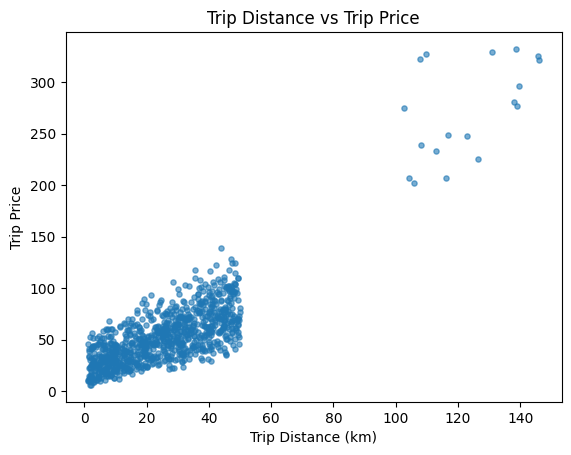

In [54]:
fig, ax = plt.subplots()
ax.scatter(df["Trip_Distance_km"], df["Trip_Price"], s=14, alpha=0.6)
ax.set_xlabel("Trip Distance (km)")
ax.set_ylabel("Trip Price")
ax.set_title("Trip Distance vs Trip Price")
plt.show()


## ssd

## sssd
